LAB: Visualización de datos usando Matplotlib
==========================================

In [13]:
## inicialización
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas
%matplotlib inline

## Punto 1

Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Se grafica la suma del porcetaje de la población por regiones.

![act2](images/suma-pob-region-edades-2.png)


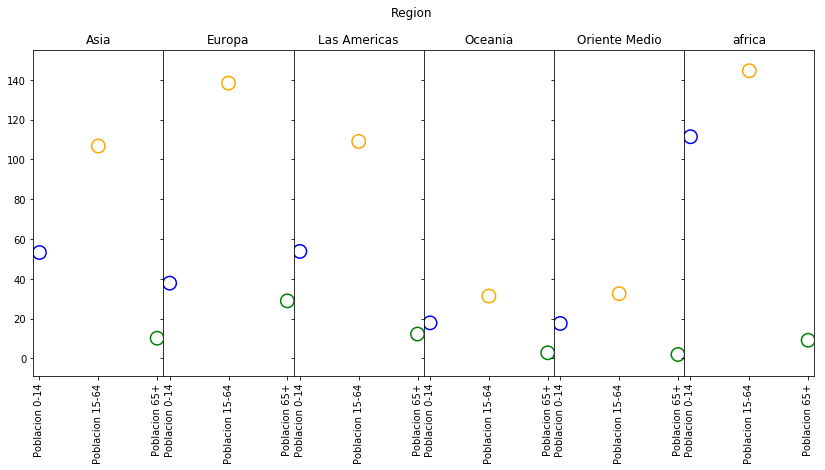

In [14]:
df = pandas.read_csv('indicadores-mundiales.csv',
                     sep=',', encoding='latin-1')

data = df.groupby('Region').sum()[['Poblacion 0-14', 'Poblacion 15-64', 'Poblacion 65+']]
data = data.T

fig, axs = plt.subplots(1, 6, sharex='col', sharey='row', figsize=(14, 6));
fig.suptitle('Region')
plt.subplots_adjust(wspace = 0, hspace=0.1)
plt.style.use('fast')
colors = ['blue', 'orange', 'green']
for index, colname in enumerate(data.columns):
    axs[index].scatter(list(data.index), data[colname]/100, linewidth=1.5, s=180, edgecolors=colors, facecolors='none')
    axs[index].set_title(colname)
    for tick in axs[index].get_xticklabels():
        tick.set_rotation(90)

## Punto 2

Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Se grafica la suma del porcetaje de la población por regiones.

![act2](images/suma-pob-region-edades-3.png)


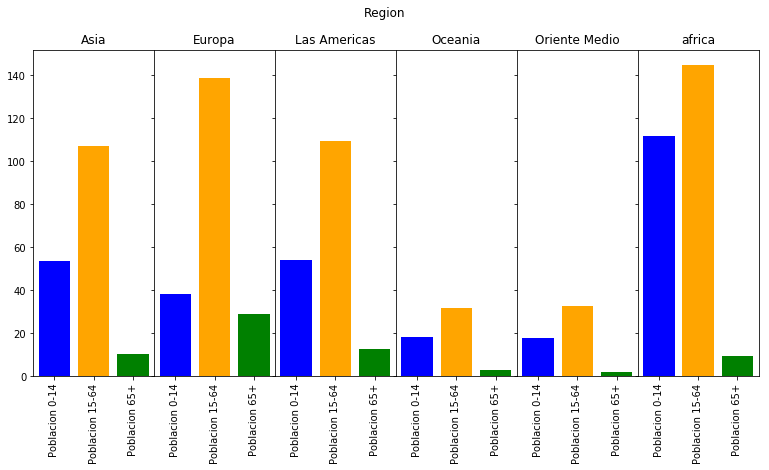

In [15]:
fig, axs = plt.subplots(1, 6, sharex='col', sharey='row', figsize=(13, 6));
fig.suptitle('Region')
plt.subplots_adjust(wspace = 0, hspace=0.1)
plt.style.use('fast')
colors = ['blue', 'orange', 'green']
for index, colname in enumerate(data.columns):
    axs[index].bar(list(data.index), data[colname]/100, color=colors)
    axs[index].set_title(colname)
    for tick in axs[index].get_xticklabels():
        tick.set_rotation(90)

## Punto 3
Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Se grafica la suma del porcetaje de la población por regiones.

![act3](images/suma-pob-region-edades-4.png)

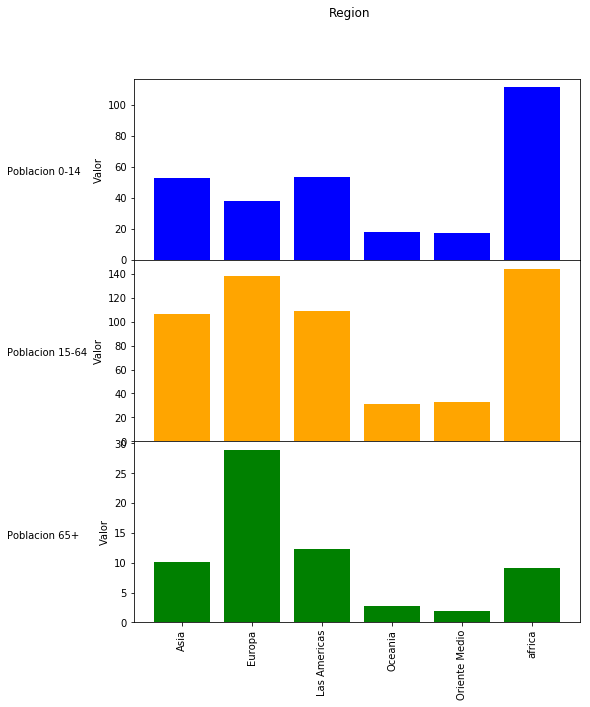

In [16]:
data2 = df.groupby('Region').sum()[['Poblacion 0-14', 'Poblacion 15-64', 'Poblacion 65+']]

fig, axs = plt.subplots(3, 1, sharex='col', sharey='row', figsize=(8, 10));
fig.suptitle('Region')
plt.subplots_adjust(wspace = 0, hspace=0)
plt.style.use('fast')
colors = ['blue', 'orange', 'green']
for index, colname in enumerate(data2.columns):
    axs[index].bar(list(data2.index), data2[colname]/100, color=colors[index])
    axs[index].set_ylabel("Valor")
    axs[index].text(-2.5, int(max(list(data2[colname]))/200), s=colname)
    for tick in axs[index].get_xticklabels():
        tick.set_rotation(90)

## Punto 4

Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Promedio de gastos per capita por año.

![act4](images/prom-gastos-salud-per-capita-ano.png)

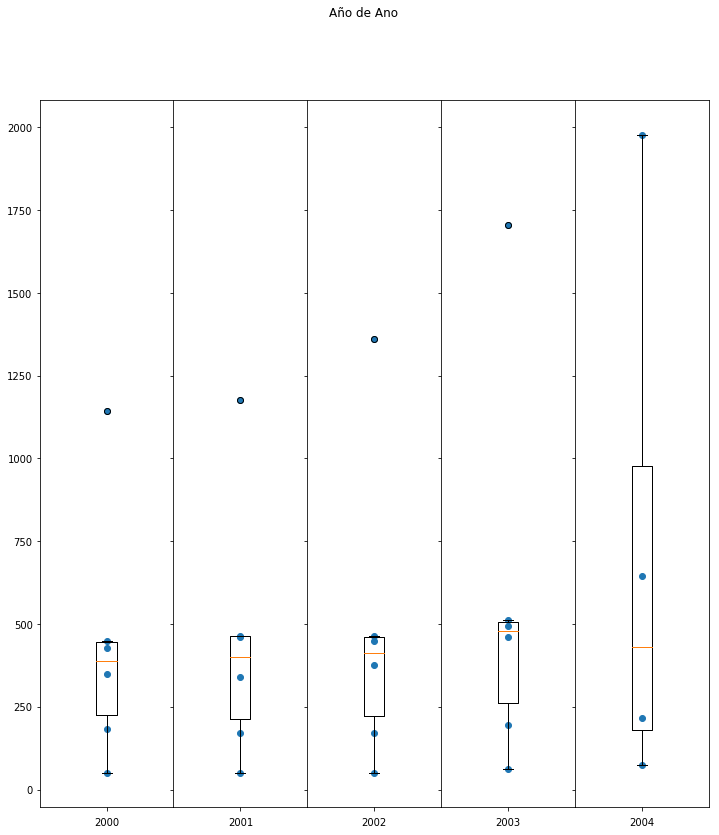

In [17]:
df['Ano']=pandas.to_datetime(df['Ano'])
df['Año']=df['Ano'].dt.year.astype(str)
df1=df.groupby(['Año','Region'])['Gasto en salud (per capita)'].mean()
df1=df1.to_frame()
df1.reset_index(inplace=True)
df1=df1.drop(['Region'],axis=1)
df1

fig, axs = plt.subplots(1, 5, sharex='col', sharey='row', figsize=(12, 13));
fig.suptitle('Año de Ano')
plt.xticks(rotation='vertical')
plt.subplots_adjust(wspace = 0, hspace=0)
plt.style.use('fast')
for index, colname in enumerate(df1['Año'].unique()):
    axs[index].boxplot(list(df1[df1['Año'] == colname].T.values[1]))
    axs[index].scatter(np.ones(df1[df1['Año'] == colname]['Gasto en salud (per capita)'].shape[0]), df1[df1['Año'] == colname]['Gasto en salud (per capita)'])
    axs[index].set_xticklabels([""])
    axs[index].set_xlabel(colname)

## Punto 5

Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Promedio de gastos per capita por año.

![act5](images/prom-region-edades-ano.png)

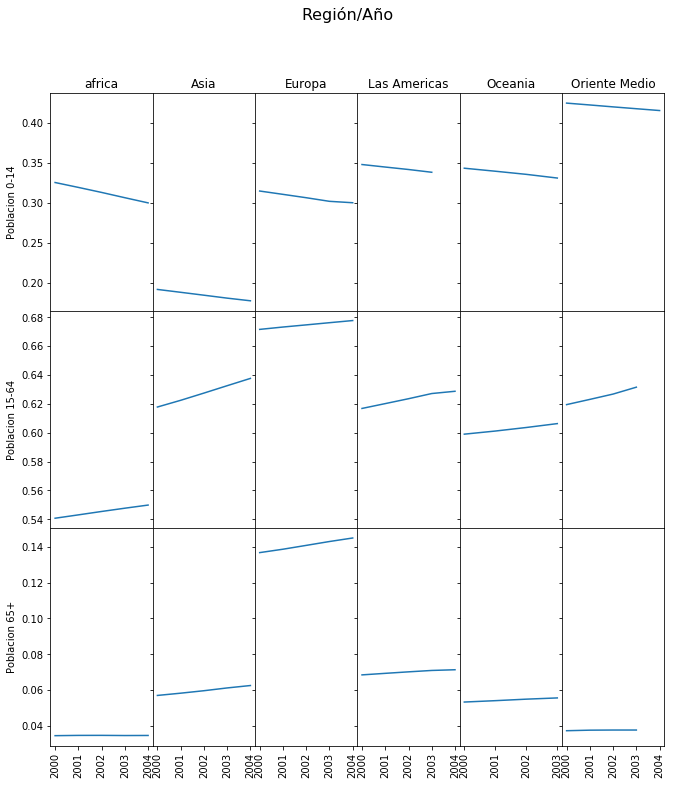

In [18]:
Años= df.Año.unique()
AUX=pandas.DataFrame()
fig1, axs = plt.subplots(3, 6, sharex='col', sharey='row', figsize=(11,12))
plt.xticks(rotation='vertical')
plt.subplots_adjust(wspace = 0, hspace=0)
lista=['Poblacion 0-14','Poblacion 15-64','Poblacion 65+']
for w, indname in enumerate(lista):
    for i, Anio in enumerate(Años):
        y=(df[df['Año'] == Anio].groupby('Region')[indname].mean()/100)
        AUX[Anio]=y
        y=[]
    AUX.index=df['Region'].unique()
    AUXT=AUX.T
    for i, colname in enumerate(AUXT.columns):
        axs[w,i].plot(AUXT[colname])
        if w==0:
            axs[w,i].set_title(colname)
        if i==0:
            axs[w,i].set_ylabel(indname)
        for tick in axs[w,i].get_xticklabels():
            tick.set_rotation(90)
fig1.suptitle('Región/Año', fontsize=16);

---